In [105]:
%matplotlib inline 

#Facial Recognition Using Eigenfaces

This program utilizes the Singular Value Decomposition to build a facial recognition system.

In [106]:
import numpy as np
from scipy import linalg
from os import walk
from scipy.ndimage import imread
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import random

For these examples, we will use the "faces94" database, which contains photos of many people.

##FacialRec Class

The initMeanImage method computes the "average face" of the images in the array we created.

The initDifferences method computes the average face and then shifts each of the faces in our
array by that average, returning an array of faces that have been mean-shifted. This exaggerates the distinguishing characteristics of each face.

The initEigenfaces method computes the compact Singular Value Decomposition (SVD) of our mean-shifted array of faces.

The project method projects a matrix onto an s-dimensional subspace.

The findNearest method projects our matrix of mean-shifted faces, shifts the image in question by the mean, and projects it. Finally, we find the vector in our array that minimizes the difference between itself and our mean-shifted image of question. This returns the index of the face vector that most closely matches our inputted image.

In [107]:
class FacialRec:
    ##########Members##########
    # F, mu, Fbar, and U
    ###########################
    def __init__(self,path):
        self.initFaces(path)
        self.initMeanImage()
        self.initDifferences()
        self.initEigenfaces()
    def initFaces(self, path):
        self.F = getFaces(path)
    def initMeanImage(self):
        self.mu = np.mean(self.F, axis = 1)
    def initDifferences(self):
        self.Fbar = self.F-np.vstack(self.mu)
    def initEigenfaces(self):
        self.U, s, Vt = la.svd(self.Fbar, full_matrices = False)
    def project(self, A, s=38):
        UsTranspose = self.U[:,:s].T
        return np.dot(UsTranspose,A)
    def findNearest(self, image, s=38):
        Fhat = self.project(self.Fbar, s)
        ghat = self.project((image - np.vstack(self.mu)),s)
        return np.argmin(np.linalg.norm(Fhat-ghat,axis = 0))

###getFaces
This function will construct a database of face images by selecting one face image per person in the faces94 directory, and return an array whose vectors represent the selected faces images.

In [108]:
def getFaces(path="/Users/goforth/Google Drive/agoforth/Volume1/lab10/faces94"):
    """Traverse the directory specified by ✬path✬ and return an array containing
    one column vector per subdirectory.
    For the faces94 dataset, this gives an array with just one column for each
    face in the database. Each column corresponds to a flattened grayscale image.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": 
                # only get jpg images
                # load image, convert to grayscale, flatten into vector
                face = imread(dirpath+"/"+f).mean(axis=2).ravel()
                faces.append(face)
                break
    # put all the face vectors column-wise into a matrix.
    F = np.array(faces).T
    return F



###sampleFaces

This function will build an array of a specified number of random faces from the faces94 database. We will use this to test the program.

In [109]:
def sampleFaces(n_tests,path = "/Users/goforth/Google Drive/agoforth/Volume1/lab10/faces94"):
    """Return an array containing a sample of n_tests images contained
    in the path as flattened images in the columns of the output.
    """
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg": # only get jpg images
                files.append(dirpath+"/"+f)
    #Get a sample of the images
    test_files = random.sample(files, n_tests)
    #Flatten and average the pixel values
    images = np.array([imread(f).mean(axis=2).ravel() for f in test_files]).T
    return images

###Plotting Functions

The functions show and show2 found below will allow us to plot and visualize the faces in our dataset.

In [110]:
def show(im, w=200, h=180):
    """Plot the flattened grayscale image 'im' of width 'w' and height 'h'."""
    plt.imshow(im.reshape((w,h)), cmap = cm.Greys_r)
    plt.show()
    
def show2(im1, im2, w=200, h=180):
    """Convenience function for plotting two flattened grayscale images of
    the specified width and height side by side.
    """
    plt.subplot(121)
    plt.title("Inputted Image")
    plt.imshow(im1.reshape((w,h)), cmap=cm.Greys_r)
    plt.axis("off")
    plt.subplot(122)
    plt.title("Closest Match")
    plt.imshow(im2.reshape((w,h)), cmap=cm.Greys_r)
    plt.axis("off")
    plt.show()

##Testing

Here, we test our getFaces function by making sure the dimensions of our array are 36,000 by 153. We create an instance of the FacialRec class, create the database array, and use a numpy method to check the number of rows and columns.

In [111]:
facialRec = FacialRec("/Users/goforth/Google Drive/agoforth/Volume1/lab10/faces94")
np.shape(facialRec.F)

(36000, 153)

###Mean Face

As you recall, the initMeanImage method computes the "average face" of the images in the array
that we created. Below, we see the "average face" of our specific database.

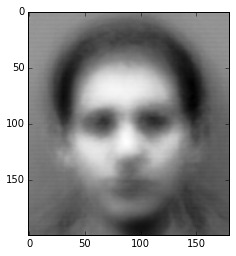

In [112]:
show(facialRec.mu)

###Mean-shifted Face

Below is an example of a "mean-shifted" face. This is an image in which all of the face's distinguishing characteristics are exaggerated.

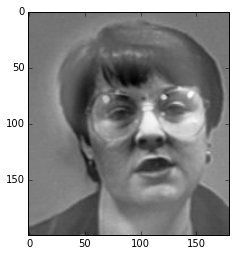

In [113]:
show(facialRec.Fbar[:,0])

###Eigenface

Below, we see the first eigenface in our dataset.

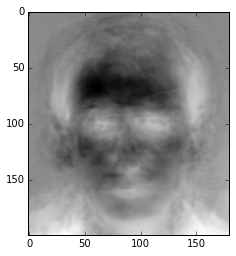

In [114]:
show(facialRec.U[:,0])

###Test on 5 random faces

The line of code below will create an array of 5 random faces from the faces94 database.

In [115]:
testimages = sampleFaces(5)

Finally, we plot each of our random faces alongside the face that our program has matched it to.

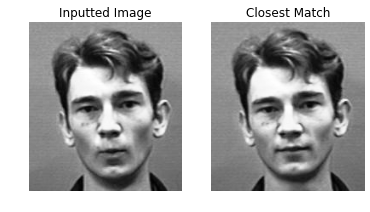

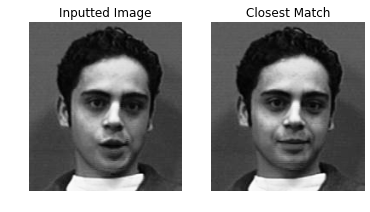

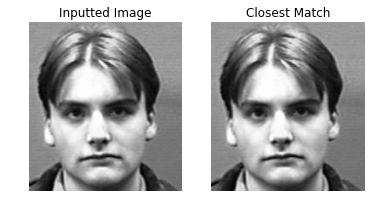

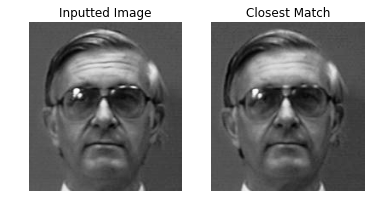

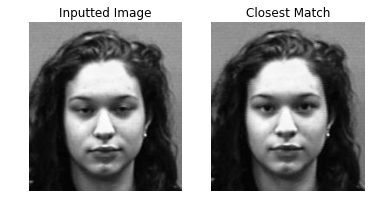

In [116]:
for x in range(5):
    index = facialRec.findNearest(np.vstack(testimages[:,x]))
    show2(testimages[:,x],facialRec.F[:,index])